## **Capstone Module 3 - Hotel Booking Cancellation Prediction**
By Rully Hilman Simeon

Table of Contents:
   - Business Problem
   - Data Understanding
   - Data preprocessing
   - Modeling
   - Conclusion
   - Recommendation

### **Business Problem**

**Context**
Hotel's revenue depends on the booking of each guest and groups. Booking could come as a direct booking to the hotel, a walk in guest, conventional travel agent or an online travel agent. Each sources and guest could be given a different prices depending on the demand on each dates. Time of the year, events, supply of rooms in each city all affects the demand of the hotel booking.
By predicting the cancellation possibility of a a guest we could forecast the rate of cancellation and maximize ADR by having an overbook

**Problem Statement**
One of the challenges experienced by hoteliers is booking cancellation. Knowing an extimate of booking cancellations could prevent hotels loss of revenue and increase revenue at the same time. During a low season, a booking cancellation means that hotel needs to refund a certain percantage of the room rate. While, on a high season, knowing an estimate of booking cancellation could give hotels an overbooking opportunity. Overbooking is a situation where hotel sold more rooms that it has on its inventory. 

**Goals**
The goal of this machine learning project is to find the most suitable model in predicting the cancellation probability of a booking. Models can be used in hotels in revenue management department as well as for the front office team, or even to enhance the demand forecast research itself.

Cancellation Policy
Guest could have cancelable bookings or a non-refundable bookings. A non-refundable booking could not be cancelled and if the guest cancelled, there would not be any monetary compensation. Cancellable Bookings could be cancelled with certain rules. Different Hotels could have different rules.Big Chain Hotel usually have a 24 - 48 hour cancellation policy. Busier hotel may apply a 72 hour cancellation policy.
Different time frame might resulted in different cancellation fee charged to customers. Knowing the cancelation rate or prediction of guests lets hotel know on how much lost revenue they would experience and it will give hotels time and opportunity to take pre-emptive measures or even for an additional revenue. 

**Analytic Apprroach**
First of all, features/columns that are available will be analyzed. Patterns that affects the degree of possiblity in booking cancellation are the aim. Using a classification algorithm like Random Forest, XGBOOST and KNNeighbors.

**Metric Evaluation**
Evaluation Metrics that will be used are Accuracy, Precision, Recall, F1 Score.

Cancel = Positive  
Type I Error (False Positive) - Accept a false null hypothesis (Guest did not cancel but is predicted otherwise)

Type II Error (False Negative) - Rejecting a true null hypothesis (Guest cancelled but is predicted otherwise)

The aim is to know the cancellation rate (True Positive) and avoiding Type I and II error as much as we can as they would cause losses. 
Therefore a high Recall value, without sacrificing a low precision value would be the aim. Balancing both recall and precision would be favorable. 

### **Data Understanding**

The data is obtained from kaggle (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) which contains detailed booking information in a city hotel or resort hotel such as length of stay, dates, number of guest, booking type, etc.

There are 119390 rows × 32 columns in the data set that will be used in the machine learning model. In this project, classification machine learning will be perform. Predicting a booking whether it will be cancelled or no. 

Columns/Features and its meaning

- Hotel - type of hotel (city or resort)
- is_canceled (Target) - whether the booking is canceled or not
- lead_time
- arrival_date_year
- arrival_date_month 
- arrival_date_week_number
- arrival_date_day_of_month
- stays_in_weekend_nights
- stays_in_week_nights
- adults - number of adult
- children - number of kids
- babies - Number of babies
- meal - Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- country - country of origin / nationality
- market_segment - Tour Agent or Tour Operator
- distribution_chanel
- is repeated guest - whether guest has came before or not
- previous cancellation - whether guest has previously cancelled a booking or not
- previous bookings not cancelled - previous successful booking
- reserved room type - room that the guest booked
- assigned room type - assigned room to the booking
- booking changes - ammendment made to the booking
- deposit_type - In case no payments were found the value is “No Deposit; If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”; Otherwise the value is set as “Refundable”
- agent - Travel Agent ID special number
- company - company/corporate that made the booking
- days_in_waiting_list - number of days the customer book to booking confirmed
- customer_type - Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- adr - stands for average daily rate (sum of all transaction / total staying nights)
- required_car_parking_spaces - number of parking space the customer requires
- total_of_special_requests - number of special request made by customer
- reservation_status
- reservation_status_date

In [1]:
#Import Packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold, ShuffleSplit, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
#Exploratory Data Analysis
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Text(0, 0.5, 'Count')

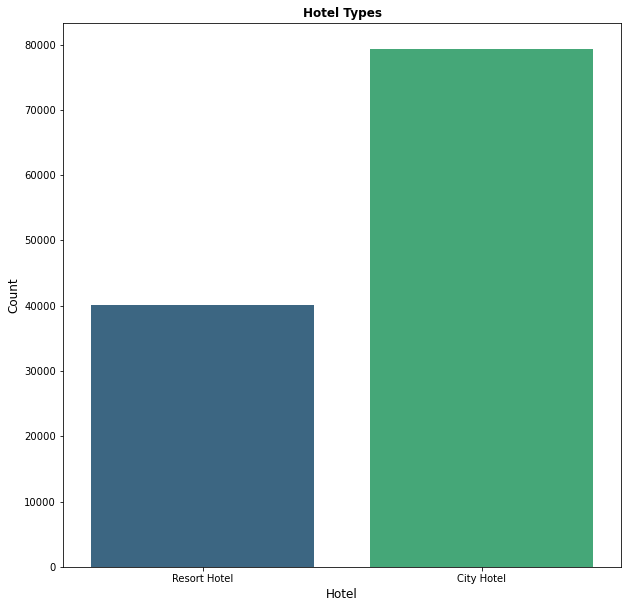

In [3]:
#Types of Hotel
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = df, palette='viridis')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

From the figure above it is known that City hotel consist of 2/3 of the data. And we can conclude that the dataset is relatively balanced. 

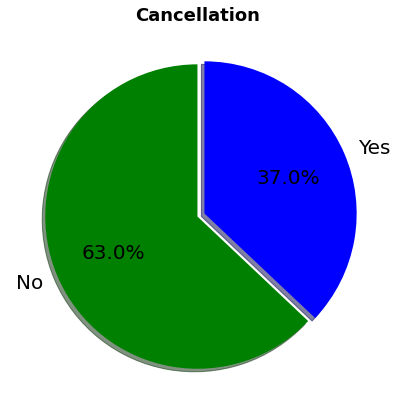

In [4]:
plt.figure(figsize=(7,7))
plt.title("Cancellation", size=18, weight='bold')
plt.pie(df['is_canceled'].value_counts(), explode=(0,0.05), labels=['No', 'Yes'], colors=["green","blue"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})
plt.show()

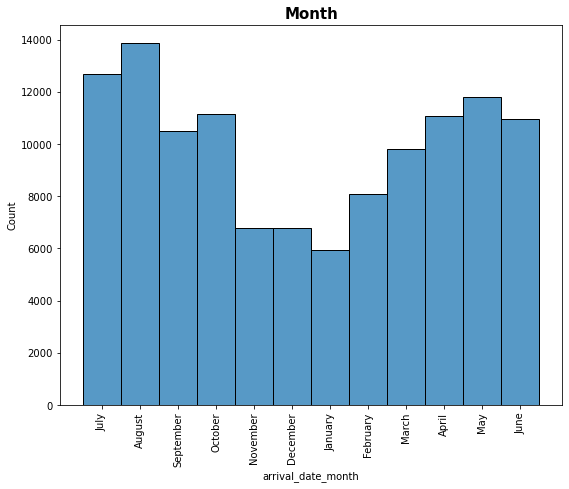

In [5]:
plt.figure(figsize=(9, 7))
sns.histplot(df['arrival_date_month'])
plt.xticks(rotation = 'vertical')
plt.title('Month', size=15, weight='bold');

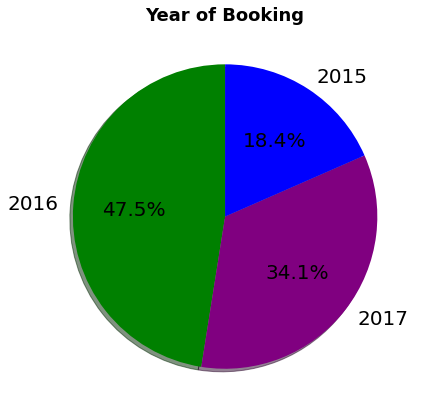

In [6]:
plt.figure(figsize=(7,7))
plt.title("Year of Booking", size=18, weight='bold')
plt.pie(df['arrival_date_year'].value_counts(), labels = ['2016', '2017', '2015'], colors=["green", "purple", "blue"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})
plt.show()

In [60]:
# Table of `stay_in_weekend` and `stay_in_week_nights` features
pd.crosstab(index = df['stays_in_week_nights'],columns=df['stays_in_weekend_nights'], margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,715,4569,2361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7645
1,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30310
2,17956,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33684
3,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22258
4,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9563
5,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0,11077
6,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0,1499
7,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0,1029
8,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0,656


Text(0, 0.5, 'Count')

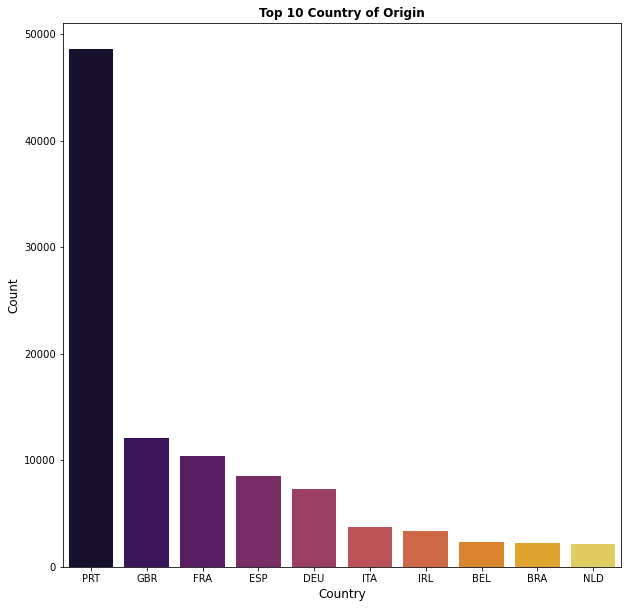

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=df, 
              order=pd.value_counts(df['country']).iloc[:10].index, palette="inferno")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

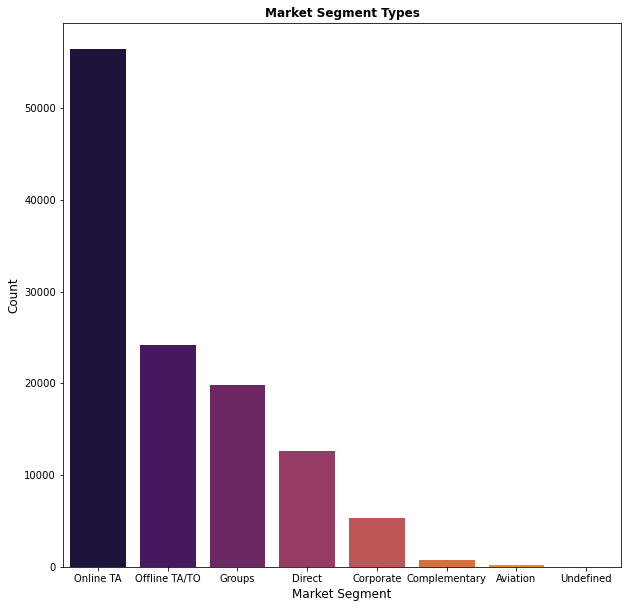

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(df['market_segment'], palette='inferno', 
              order=pd.value_counts(df['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [10]:
# DATA PREPROCESSING
datadesc = []
for i in df.columns:
    datadesc.append([i,
                    df[i].dtypes,
                    df[i].isna().sum(),
                    round((df[i].isna().sum()/len(df)*100),2),
                    df[i].nunique(),
                    df[i].drop_duplicates().sample(1).values])
                     
pd.DataFrame(datadesc, columns = ['Data Features', 
                                 'Data Types',
                                 'Null',
                                 'Null Percentage',
                                 'Unique',
                                 'Unique Sample'])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,hotel,object,0,0.00,2,[City Hotel]
1,is_canceled,int64,0,0.00,2,[1]
2,lead_time,int64,0,0.00,479,[496]
3,arrival_date_year,int64,0,0.00,3,[2016]
4,arrival_date_month,object,0,0.00,12,[October]
5,arrival_date_week_number,int64,0,0.00,53,[52]
6,arrival_date_day_of_month,int64,0,0.00,31,[11]
7,stays_in_weekend_nights,int64,0,0.00,17,[9]
8,stays_in_week_nights,int64,0,0.00,35,[25]
9,adults,int64,0,0.00,14,[2]


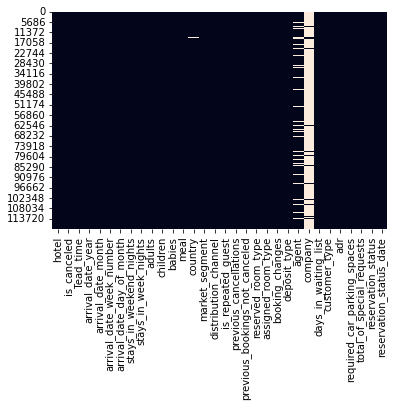

In [11]:
sns.heatmap(df.isnull(), cbar=False);

In [12]:
# Check duplicated data
df.duplicated().sum()

31994

There are only four features that are found to have null value.
- Country 0.41%
- Children only 4 rows
- Agent - 13.69%
- company - 94.31%

There are slightly more than thirty thousand data which is about 30% of the dataset which are found to be duplicated. However, as this is a bookings withough booking id, there are possiblity that it has same booking features with different guest.

### **Data Correlation**

In [13]:
import dython
from dython.nominal import associations, cramers_v, theils_u, correlation_ratio

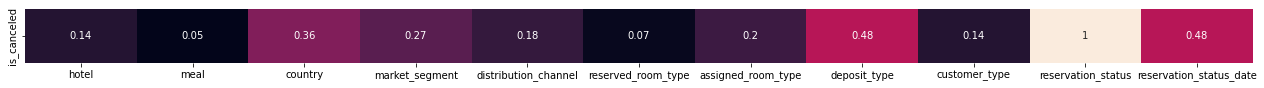

In [14]:
assoc_cr = []
col = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
                               'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
for i in col: 
    assoc = round(cramers_v(df['is_canceled'], df[i]), 2) 
    assoc_cr.append(assoc)
    
df_cr = pd.DataFrame(data = [assoc_cr], columns = col, index=['is_canceled'])

plt.figure(figsize=(22, 1))
sns.heatmap(df_cr, annot = True, cbar=False)
plt.show()

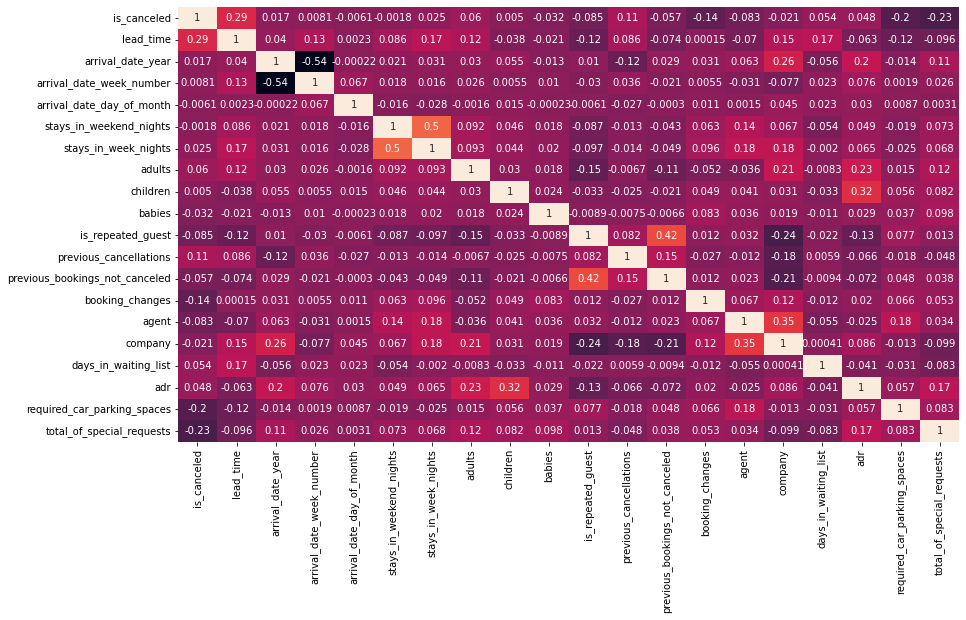

In [15]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

Based on the correlation and association done above. it is evident that arrival date week number, arrival date day of month, stays in weekend nights has the lowest correlation score with the target. 
Therefore those columns will be dropped.

Dropping columns which has more than 90% of missing values and columns which are not suitable for the models

In [16]:
df.drop(['company'], axis = 1, inplace=True)

In [17]:
# drop because it has a correlation value of 1
df.drop(['reservation_status'], axis = 1, inplace=True)

In [18]:
df.drop(['reservation_status_date'], axis = 1, inplace=True)

In [19]:
df['country'] = df['country'].fillna('OTH')

In [20]:
df.drop(['children'], axis = 1, inplace=True)

In [21]:
df.drop(['agent'], axis=1, inplace=True)

In [22]:
# Target Column has already been in binary forms, so encoding isn't needed
df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [23]:
#seperating the dataset to target and features
X = df.drop(columns = 'is_canceled')
y = df['is_canceled']

In [24]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size = .80, random_state=42)

In [25]:
col = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
               'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 
               'booking_changes', 'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

In [26]:
for i in X_train.columns:
    print(i, X_train[i].dtypes)

hotel object
lead_time int64
arrival_date_year int64
arrival_date_month object
arrival_date_week_number int64
arrival_date_day_of_month int64
stays_in_weekend_nights int64
stays_in_week_nights int64
adults int64
babies int64
meal object
country object
market_segment object
distribution_channel object
is_repeated_guest int64
previous_cancellations int64
previous_bookings_not_canceled int64
reserved_room_type object
assigned_room_type object
booking_changes int64
deposit_type object
days_in_waiting_list int64
customer_type object
adr float64
required_car_parking_spaces int64
total_of_special_requests int64


In [27]:
cat_columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 
               'assigned_room_type', 'deposit_type', 'customer_type']
#num_columns = ['lead time', 'days_in_waiting_list', 'adr']

# numeric_pipeline = Pipeline([
    # ('scaler', RobustScaler()),
    # ('poly', PolynomialFeatures(degree=3, include_bias=False)),
#     ('power', PowerTransformer(method='yeo-johnson'))
# ])

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),

])

preprocessor = ColumnTransformer([
    # ('numeric', numeric_pipeline, num_columns),
    ('categoric', categoric_pipeline, cat_columns),
    ('binary', ce.BinaryEncoder(), ['country'])
], remainder='passthrough')

pipe_DTree = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeClassifier())
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

pipe_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier())
])

In [28]:
base_model= [pipe_DTree, pipe_RF, pipe_XGB]
model = ['DT', 'RF', 'XGB']
data = {}

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    y_predict_proba = Model.predict_proba(X)[:,1]
    roc_auc = roc_auc_score(y_true, y_predict_proba)
    return Acc, Rec, Prec, F1, roc_auc

In [29]:
for i in range(len(base_model)):
    base_model[i].fit(X_train, y_train)
    Acc_train, Rec_train, Prec_train, F1_train, roc_auc_train = Eva_Matrix(base_model[i], X_train, y_train)
    Acc_test, Rec_test, Prec_test, F1_test, roc_auc_test = Eva_Matrix(base_model[i], X_test, y_test)
    data[f'Train {model[i]}'] = Acc_train, Rec_train, Prec_train, F1_train, roc_auc_train
    data[f'Test {model[i]}'] = Acc_test, Rec_test, Prec_test, F1_test, roc_auc_test
pd.DataFrame(data = data, index = ["Accuracy", "Recall", "Precision", "F1", "roc_auc"]).T.sort_values('F1', ascending=False)

,Accuracy,Recall,Precision,F1,roc_auc
Train RF,0.996325,0.993951,0.996119,0.995034,0.999639
Train DT,0.996325,0.992905,0.997161,0.995029,0.999963
Test RF,0.889229,0.799774,0.890035,0.842494,0.953472
Train XGB,0.887396,0.810566,0.876169,0.842091,0.958556
Test XGB,0.871430,0.783267,0.857320,0.818622,0.945554
Test DT,0.842114,0.792086,0.783932,0.787988,0.834051


In [37]:
RF_1 = RandomForestClassifier()

ERROR! Session/line number was not unique in database. History logging moved to new session 237


In [38]:
param_RF = {'algo__n_estimators':np.arange(1,100,1),
            'algo__max_depth':np.arange(100,1000,20),
            'algo__min_samples_leaf':np.arange(1,50,1),
            'algo__max_features':np.arange(0,10,0.25)}

In [40]:
RS_RF = RandomizedSearchCV(pipe_RF, param_RF, cv = 3, n_jobs=-1, verbose = 3, scoring = 'r2', n_iter=500)

In [41]:
RS_RF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categoric',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['hotel',
                                                                                'arrival_date_month',
                                                                                'meal',
                                                                                'market_segment',
                                                                                'distribution_channel',
                        

In [42]:
RF_Tuned = RS_RF.best_estimator_

In [47]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, F1

In [48]:
RF_Acc_train, RF_Rec_train, RF_Prec_train, RF_F1_train = Eva_Matrix(RS_RF, X_train, y_train)

In [49]:
RF_Acc_test, RF_Rec_test, RF_Prec_test, RF_F1_test = Eva_Matrix(RS_RF, X_test, y_test)

In [50]:
data_RF ={
    'RF Train' : [RF_Acc_train, RF_Rec_train, RF_Prec_train, RF_F1_train],
    'RF Test' : [RF_Acc_test, RF_Rec_test, RF_Prec_test, RF_F1_test]
}

In [66]:
pd.DataFrame(data=data_RF, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,RF Train,RF Test
Accuracy,0.864562,0.855432
Recall,0.755900,0.736009
Precision,0.861482,0.853547
F1,0.805245,0.790432


In [52]:
# Depth of the Trees
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Number of Trees
n_estimators = list(np.arange(100, 201))

# Branches amount (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) #the bigger the number the simpler the model

# Feature amount used on every trees (% from total train set column)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # the bigger the number the simpler the model

# Hyperparam space XGboost
param_xgb = {
    'algo__max_depth': max_depth, 
    'algo__learning_rate': learning_rate,
    'algo__n_estimators': n_estimators,
    'algo__subsample': subsample,
    'algo__gamma': gamma,
    'algo__colsample_bytree': colsample_bytree,
    'algo__reg_alpha': reg_alpha
}


In [53]:
RS_XGB = RandomizedSearchCV(pipe_XGB, param_xgb, cv=3, n_jobs=-1, verbose=1, scoring='r2', n_iter=500)

In [54]:
RS_XGB.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categoric',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['hotel',
                                                                                'arrival_date_month',
                                                                                'meal',
                                                                                'market_segment',
                                                                                'distribution_channel',
                        

In [55]:
XGB_Tuned = RS_XGB.best_estimator_
XGB_Tuned.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categoric',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                              

In [56]:
XGB_Acc_train, XGB_Rec_train, XGB_Prec_train, XGB_F1_train = Eva_Matrix(RS_XGB, X_train, y_train)

In [57]:
XGB_Acc_test, XGB_Rec_test, XGB_Prec_test, XGB_F1_test = Eva_Matrix(RS_XGB, X_test, y_test)

In [58]:
data_XGB ={
    'XGB Train' : [XGB_Acc_train, XGB_Rec_train, XGB_Prec_train, XGB_F1_train],
    'XGB Test' : [XGB_Acc_test, XGB_Rec_test, XGB_Prec_test, XGB_F1_test]
}

In [59]:
pd.DataFrame(data=data_XGB, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,XGB Train,XGB Test
Accuracy,0.915047,0.862342
Recall,0.869612,0.797626
Precision,0.897832,0.824953
F1,0.883497,0.811059


### **Conclusion**

The first three fitting of three models (XGBoost, Random Forest, and Decision Tree) resulted in a relatively good matrics. 
The highest was done with Random Forest with and the second was done with XGBoost.

              Accuracy	  Recall	Precision	
Train RF	|0.996325	  |0.993951	    | 0.996119

Test RF	    |0.889229	  |0.799774	    | 0.890035

Train DT	|  0.996325	  | 0.992905	|  0.997161

Test DT	    | 0.842114	  | 0.792086    |  0.783932

Train XGB	| 0.887396	  | 0.810566	|  0.876169

Test XGB	| 0.871430	  |0.783267	    |  0.857320

So these two models were picked to be further tuned to obtain a better result. 
However a hyperparameter tuning does not guarantee a better result. It resulted in lower value than the initial fittings. 

Thus far, with all the fittings of each algorithms and tunings that had been done. The first Random Forest algorithm model has the highest value of Recall and precision.

### **Recommendation**

There are several ways to improve the model on predicting hotel booking cancellations. The most important thing in building this model is the data itself. 
Therefore, to acheive a better model certain steps needs to be taken:

- Although there are 30 columns/features in the dataset, not all the features are relevant or correlated to the target. A more relevant and correlated features to the columns needs to be collected.
- The unrelated features should also be dropped. Features that are causing error rather than giving patterns to the target
- The tuned models resulted in a lower evaluation matrixes and to improve this situation a different algorithms needs to be tested 
- Other than new algorithm, improving current model needs another combination of hyper parameter tuning. Taking into account the parameter used suitable to the current computation power. 

### **Save Model**

In [63]:
import pickle
pickle.dump(RS_XGB, open('XGB_Model.pkl', 'wb'))

In [64]:
pickle.dump(RS_RF, open('RF2_Model.pkl', 'wb'))

### **Load Model**

In [ ]:
Model = joblib.load('XGB_Model.pkl')